<a href="https://colab.research.google.com/github/stern-adrian/MIT-Global-COVID-Modelling-Project-1/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 1. Signal type classification 
<!-- $\color{red} {\text{perhaps for binary Classification (for simplification)}}$  -->

**Deadline**: 

**Submission**: Submit a PDF export of the completed notebook as well as the ipynb file. 



In this assignment, we will build models to predict types of signals.  We will be using the "raw_data Data Set"


Note that you are not allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.

# Question 1. Data (24%)
Start by setting up a Google Colab notebook in which to do your work. Since you are working with a partner, you might find this link helpful:

https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb
The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together.

To process and read the data, we use the popular pandas package for data analysis.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io

Now that your notebook is set up, we can load the data into the notebook. The code below loading the data through mounting Google Drive.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/' # TODO - UPDATE ME WITH THE TRUE PATH!
# spec_df = pd.read_csv(f'{path}/two_spect_data3.csv')
raw_df = pd.read_csv(f'{path}/two_raw_data3.csv')
t_label = ["classes"]
raw_labels = list(raw_df.columns[1:])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now that the data is loaded to your Colab notebook and you should be able to display the Pandas
DataFrames `spec_df` and `raw_df` as a table:

In [ ]:
raw_df

,classes,var0,var1,var2,var3,var4,var5,var6,var7,var8,...,var491,var492,var493,var494,var495,var496,var497,var498,var499,var500
0,ThreeFrequency,-0.222203,2.981530,0.145949,0.762917,-0.261905,2.232161,-0.289897,1.819705,2.075161,...,-2.427629,0.346731,0.110178,-0.329178,-1.323069,-0.917122,1.206631,-0.204244,-0.507337,-0.410310
1,Gaussian,-0.082501,0.203441,0.313050,0.192809,0.609284,0.443385,0.161669,0.680401,0.245051,...,-0.473711,0.215788,-0.220261,-0.305566,-0.897981,0.033454,0.093574,-0.100014,0.131326,-0.006234
2,Gaussian,-0.277024,-0.446225,0.117801,0.304224,0.044656,0.274175,-0.309724,0.148173,0.425388,...,-0.239046,-0.337020,-0.372262,-0.032340,-0.097839,0.970769,0.194506,-0.058148,-0.311031,-0.234524
3,ThreeFrequency,0.483017,3.612619,0.281694,-1.326836,3.594519,-0.086407,-0.455847,-0.386119,-2.598041,...,-2.233859,-3.104952,2.673918,1.481023,-2.601189,-0.281514,2.179922,-0.982385,-0.817089,-0.880956
4,ThreeFrequency,0.455514,0.561758,-0.194305,-0.031994,0.971476,-1.493428,1.036775,0.103530,3.706463,...,-0.156287,-0.582626,-3.755279,-1.836890,1.547593,0.436597,-2.314158,-0.436851,-3.803123,0.990107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ThreeFrequency,0.256850,3.102338,-1.347967,1.699668,-1.490427,0.562022,0.133665,1.724887,-2.009447,...,-2.420706,-1.097620,-4.645153,-1.421381,1.502851,-1.771108,-1.360542,0.614895,-1.039501,0.642990
19996,Gaussian,0.338344,0.169216,-0.016642,0.425137,0.054731,1.225629,0.295933,0.360922,0.032810,...,0.375492,0.082670,0.525066,0.206457,0.632893,0.516926,0.332797,0.141414,0.705585,0.582235
19997,ThreeFrequency,-0.401101,1.973579,0.562200,0.939767,-1.620821,0.636394,0.650923,-0.727978,1.967403,...,-0.740585,-4.425807,0.683405,0.406824,0.654422,0.350299,-2.860274,-1.009531,-1.597658,-2.731393
19998,Gaussian,0.452869,1.080941,0.900998,0.535754,0.750392,0.161860,0.684246,1.043127,0.553882,...,-0.226246,0.159702,-0.158096,0.281974,0.019669,-0.091239,0.134851,0.089751,-0.395457,0.127364


We want to add noise to the raw data:

In [ ]:
data_arr = raw_df[raw_labels].to_numpy()
data_arr = data_arr + np.random.randn(1)
data_df = pd.DataFrame(data_arr, columns=raw_labels)
df = raw_df[t_label].join(data_df)
df

,classes,var0,var1,var2,var3,var4,var5,var6,var7,var8,...,var491,var492,var493,var494,var495,var496,var497,var498,var499,var500
0,ThreeFrequency,0.750780,3.954513,1.118932,1.735899,0.711078,3.205144,0.683086,2.792687,3.048143,...,-1.454646,1.319713,1.083160,0.643804,-0.350086,0.055861,2.179613,0.768739,0.465645,0.562672
1,Gaussian,0.890482,1.176423,1.286033,1.165792,1.582267,1.416368,1.134651,1.653384,1.218034,...,0.499272,1.188770,0.752721,0.667417,0.075001,1.006436,1.066557,0.872969,1.104309,0.966749
2,Gaussian,0.695959,0.526757,1.090784,1.277207,1.017638,1.247157,0.663259,1.121156,1.398370,...,0.733936,0.635962,0.600721,0.940643,0.875143,1.943752,1.167488,0.914835,0.661952,0.738458
3,ThreeFrequency,1.456000,4.585602,1.254676,-0.353853,4.567502,0.886576,0.517136,0.586864,-1.625059,...,-1.260877,-2.131970,3.646901,2.454006,-1.628207,0.691469,3.152905,-0.009403,0.155893,0.092027
4,ThreeFrequency,1.428496,1.534740,0.778677,0.940988,1.944459,-0.520446,2.009758,1.076513,4.679446,...,0.816695,0.390356,-2.782296,-0.863908,2.520575,1.409579,-1.341176,0.536132,-2.830141,1.963089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ThreeFrequency,1.229833,4.075321,-0.374984,2.672651,-0.517444,1.535005,1.106647,2.697870,-1.036465,...,-1.447724,-0.124638,-3.672171,-0.448398,2.475834,-0.798126,-0.387559,1.587877,-0.066518,1.615972
19996,Gaussian,1.311326,1.142199,0.956340,1.398120,1.027714,2.198612,1.268915,1.333904,1.005792,...,1.348474,1.055653,1.498048,1.179440,1.605875,1.489908,1.305780,1.114397,1.678567,1.555217
19997,ThreeFrequency,0.571882,2.946561,1.535182,1.912750,-0.647839,1.609377,1.623906,0.245004,2.940385,...,0.232397,-3.452824,1.656388,1.379807,1.627404,1.323282,-1.887292,-0.036549,-0.624676,-1.758411
19998,Gaussian,1.425851,2.053923,1.873980,1.508737,1.723375,1.134843,1.657229,2.016110,1.526864,...,0.746736,1.132685,0.814886,1.254957,0.992652,0.881744,1.107834,1.062734,0.577526,1.100346


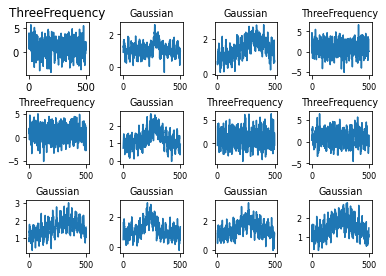

In [ ]:
"""
Plotting the raw data

"""

num_plots = 12
x_data = df.iloc[:num_plots, 1:].values # converting all values in the data frame to a numpy array
y_data = df.iloc[:num_plots, 0].values # converting the labels in the data frame to a numpy array
plt.figure()
for idx in range(num_plots):
  plt.subplot(3, 4, idx+1)
  plt.plot(x_data[idx])
  plt.title(y_data[idx])
  plt.rcParams['font.size'] = 8
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.7)


Our neural network will take as input the noisy spectrograms data and predict its class. 
Since we have two string classes we want to convert them into a numbers, 
where each number assigned to each class.

In [ ]:
df.replace({'Gaussian': 0, 'ThreeFrequency': 1}, inplace=True)

In [ ]:
df.head(12)

,classes,var0,var1,var2,var3,var4,var5,var6,var7,var8,...,var491,var492,var493,var494,var495,var496,var497,var498,var499,var500
0,1,0.750780,3.954513,1.118932,1.735899,0.711078,3.205144,0.683086,2.792687,3.048143,...,-1.454646,1.319713,1.083160,0.643804,-0.350086,0.055861,2.179613,0.768739,0.465645,0.562672
1,0,0.890482,1.176423,1.286033,1.165792,1.582267,1.416368,1.134651,1.653384,1.218034,...,0.499272,1.188770,0.752721,0.667417,0.075001,1.006436,1.066557,0.872969,1.104309,0.966749
2,0,0.695959,0.526757,1.090784,1.277207,1.017638,1.247157,0.663259,1.121156,1.398370,...,0.733936,0.635962,0.600721,0.940643,0.875143,1.943752,1.167488,0.914835,0.661952,0.738458
3,1,1.456000,4.585602,1.254676,-0.353853,4.567502,0.886576,0.517136,0.586864,-1.625059,...,-1.260877,-2.131970,3.646901,2.454006,-1.628207,0.691469,3.152905,-0.009403,0.155893,0.092027
4,1,1.428496,1.534740,0.778677,0.940988,1.944459,-0.520446,2.009758,1.076513,4.679446,...,0.816695,0.390356,-2.782296,-0.863908,2.520575,1.409579,-1.341176,0.536132,-2.830141,1.963089
5,0,0.710017,0.883515,1.042891,1.279959,1.265496,1.524052,0.803361,1.205888,1.460086,...,1.396703,1.228740,1.426314,0.572143,0.640351,0.906214,0.878228,0.332069,0.694423,0.929612
6,1,-0.412070,2.021647,3.722195,1.449890,4.104739,-0.167468,-0.081206,3.812193,2.624640,...,1.584826,-1.304545,1.887362,2.290380,-1.188629,0.172156,2.083627,1.832252,-0.495839,2.101634
7,1,0.352050,1.493198,0.998372,0.922526,2.069452,2.979186,3.036937,2.540066,3.484262,...,-0.513144,0.535733,-0.096613,-1.127228,-1.988433,-2.652734,-1.904910,-1.848129,1.561353,-1.039465
8,0,0.962158,0.776341,1.328811,1.374634,1.289230,1.762360,1.094022,1.140229,1.467919,...,0.965747,1.425350,0.699864,1.100684,1.289695,1.528246,1.405809,1.211142,1.011073,1.599506
9,0,0.500751,1.105737,1.358128,1.656452,1.516290,1.106680,1.696084,1.176609,1.872468,...,0.946396,0.290545,0.213267,0.453617,1.152658,1.014222,0.913699,0.466099,0.786673,1.352789


### Part (a) -- 8%

After converting the classes into numbers we can split into training and test sets.

When we split the data into a train test split, we want to make sure that no same spectrogram data ends up in both training and test set.

Explain why it would be problematic to have
some spectrograms data in the training set, and other same spectrograms data in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a data it hasn't learned about.)

In [ ]:
# Write your explanation here:


In [ ]:
train_df = df[:18000]
test_df = df[18000:]

# Convert to numpy
train_xs = train_df[raw_labels].to_numpy()
train_ts = train_df[t_label].to_numpy()
test_xs = test_df[raw_labels].to_numpy()
test_ts = test_df[t_label].to_numpy()


### Part (b) -- 8%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = train_df.mean()[1:].to_numpy() # the [1:] removes the mean of the "class" field
feature_stds = train_df.std()[1:].to_numpy()

    
train_xs_norm = (train_xs - feature_means) / feature_stds
test_xs_norm = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)


**Write your explanation here:**


### Part (c) -- 8%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# Shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_xs_norm = train_xs_norm[reindex]
train_ts = train_ts[reindex]

# use the first 1800 elements of `train_xs` as the validation set
train_xs, val_xs = train_xs[1800:], train_xs[:1800]
train_norm_xs, val_norm_xs = train_xs_norm[1800:], train_xs_norm[:1800]
train_ts, val_ts = train_ts[1800:], train_ts[:1800]

**Write your explanation here:**

## Part 2. Classification (76%)

We will first build a *classification* model to perform spectrogram classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def mse_cost(y, t):
  return (np.linalg.norm((y - t), ord=2)**2)/len(y)

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}

where the value of $y$ is an estimate of the probability that the estimated spectrogram is the true one.

In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (501,)
                 type(b) == float
                 np.shape(X) = (N, 501) for some N

  >>> pred(np.zeros(501), 1, np.ones([3, 501]))
  array([0.73105858, 0.73105858, 0.73105858]) 
  # It's okay if your output differs in the last decimals

  """
  # Write your code here



### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 501) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (501,)
           type(dLdb) = float
  """
  # Write your code here



### Part (c) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (501,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (501,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]
      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction

      # update w and b

      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):

        val_cost = ...
        val_acc = ...
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
      
  return ...



### Part (d) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to random.
Show what happens if the learning rate $\mu$ is too small, too large, and in between these values, where $0 < \mu < 1$. The demonstration should be made using plots showing these effects.

In [ ]:
w0 = np.random.randn(501)
b0 = np.random.randn(1)[0]

# Write your code here





**Explain and discuss your results here:**


### Part (e) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to random values.
Play with the learning rate $\mu$ and the batch size and show what happens when the data is normalized and what happens when the data is not normilized. The demonstration should be made using plots showing these effects.

In [ ]:
w0 = np.random.randn(501)
b0 = np.random.randn(1)[0]

# Write your code here


**Explain and discuss your results here:**




### Part (f) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose the learning rate $\mu$ and the batch size 
and if you used the normalized data or not. Show plots demostrating good and bad behaviours.

In [ ]:
w0 = np.random.randn(501)
b0 = np.random.randn(1)[0]

# Write your code here


**Explain and discuss your results here:**




### Part (g) -- 10%

Using the values of `w` and `b` from part (f), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here

train_acc = ...
val_acc = ...
test_acc = ...

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


**Explain and discuss your results here:**


### Part (h) -- 10%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LinearRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
import sklearn.linear_model

# model = ...

# train_acc = ...
# val_acc = ...
# test_acc = ...

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**


### Part (i) -- 14%

We trained the model with MSE loss for a classification problem, this is not an ideal loss for classification. 

Please explain why using MSE loss is not an ideal loss for a classification problem and suggest more suitable loss for a classification problem.

In [ ]:
# Write your explanation here:
